# Harry (Shenghuan) Sun's answers for questions

## Part1

1) For both Smith-Waterman and Needleman-Wunsch algorithms:
    a) What are the parameters and variables required for algorithm initialization, execution, and termination?
    b) What quantities are returned?
    c) What is the runtime complexity?
    
a) For algorthims initialization, we need the orignal sequence, the score_matrix, and defining the open gap penalty and extension penalty. For excution, the align matrix is computed. And the "flow" when computing the alignment matrix was recorded.[This part will be expalined more delibrately in the README and code comments] When needed to calculated the alignment score, starting the right bottom coner (for NeedlemanWunsh) or the peak value (for SmithWaterman) and the alignment sequence was formed along the "flow". For termination, once the point reach the left or top broader ( for NeedlemanWunsh) ; zero value shown up ( for SmithWaterman), the termination happens.

2) functionalities in initialization, execution and termination are shared between these algorithms? Which are not shared?

Shared: The function for genrating the score matrix; generating orignial sequence from fasta files; 

Not shared: When initializing the align_matrix, global alignment just finds the max value (for the path), while the local alignment have one more decision to made: if the max value is still negative change it to zero and stop the alignment. Moreover, for computing the alignment score, global alignment starts from the right bottom corner and local alignment starts from the highest values whenever in the matrix. And as mentioned previous, local alignment stops when embraced the zero value. While global aligment stops only when it reach the left or top barrier.

3) How does affine-gap based alignment differ from linear-gap alignment in terms of implementation?

affine-gap penalty = open penalty + (n-1)* extension penalty
For implementation, whenever we decide to claim there is a gap instead of mismatch, we need to justify whether the gap have happend or not. If have happend, then it is a extension cost, if it is complete for the previous element then give it an open gap penalty.

4) Write out an API (methods, variables) with which a user could interact with your class. For each method, define what it does, the arguments and data types, the functionality, and what it returns.

Please look into the README file. Thanks!

## Part2

In [51]:
#load codes

import multiprocessing
import fastaparser
import glob
import os
import sys
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
import sklearn.metrics as skl_metrics
import fastaparser
from algs import  SmithWaterman, score_matrix, NeedlemanWunsch
import seaborn as sns
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()


def compute_SmithWaterman_Score(list1, list2, truth,index,mtx_dir,gop,gep,filename):
    print(index)
    Align = SmithWaterman(list1[index], list2[index],mtx_dir,gop,gep)
    #Align_scores.append(Align.compute_alignment_score())
    #Indicators.append(ground_truth[index])
    score = Align.compute_alignment_score()
    with open(filename+".txt", "a") as text_file:
        text_file.write(str(index)+'\t'+str(truth[index])+'\t'+str(score)+'\n')
        
def compute_NeedlemanWunsch_Score(list1, list2, truth,index,mtx_dir,gop,gep,filename):
    print(index)
    Align = SmithWaterman(list1[index], list2[index],mtx_dir,gop,gep)
    #Align_scores.append(Align.compute_alignment_score())
    #Indicators.append(ground_truth[index])
    score = Align.compute_alignment_score()
    with open(filename+".txt", "a") as text_file:
        text_file.write(str(index)+'\t'+str(truth[index])+'\t'+str(score)+'\n')

/home/jingjinglab/cw/miniconda3/envs/Harry_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1) With the BLOSUM50 matrix and a gap opening cost of 11 and a gap extension cost of 3, locally align these sequences and visualize the distribution of alignment scores. How would you describe this distribution?

In [2]:
# read the direction of all sequence pairs and record the ground truth. Pospairs as 1 and Negpairs as 0


ground_truth  = []
sequence_dirA = []
sequence_dirB = []
with open('../scoring_matrices/Negpairs.txt' , 'r') as f:
    
    
    for line in f:
        line = line.replace('\n','')
        seq1 = '../'+line.split(' ')[0]
        seq2 = '../'+line.split(' ')[1]
        sequence_dirA.append(seq1)
        sequence_dirB.append(seq2)
        ground_truth.append(0)

with open('../scoring_matrices/Pospairs.txt' , 'r') as f:
    
    
    for line in f:
     
        line = line.replace('\n','')
    
        seq1 = '../'+line.split(' ')[0]
        seq2 = '../'+line.split(' ')[1]
     
        sequence_dirA.append(seq1)
        sequence_dirB.append(seq2)
        ground_truth.append(1)
        


/home/jingjinglab/cw/miniconda3/envs/Harry_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for i in range(0,len(sequence_dirA)):
    compute_SmithWaterman_Score(sequence_dirA,sequence_dirB, ground_truth, i ,'../scoring_matrices/BLOSUM50.mat',11,3,'BLOSUM50_11_3.txt')

In [47]:
table = pd.read_csv('BLOSUM50_11_3.txt.txt', sep ='\t', header = None, index_col= None)

/home/jingjinglab/cw/miniconda3/envs/Harry_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/jingjinglab/cw/miniconda3/envs/Harry_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/jingjinglab/cw/miniconda3/envs/Harry_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


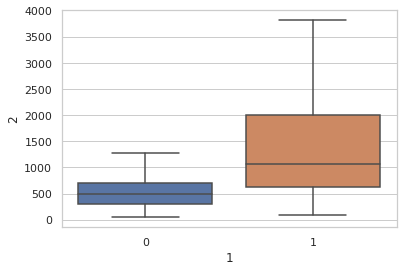

In [64]:
sns.set(style ='whitegrid')

ax = sns.boxplot(table[1],table[2], showfliers=False )
#ax = sns.swarmplot(table[1], table[2], color = '.25', showfliers =False)


Answer: Based on the distribution, we found out that the positive paired sequences tend to have higher scores. 

2) Generate a confusion matrix indicating the frequency of false positives, falsenegatives, true positives, and true negatives when using the average alignmentscore as a threshold. What is the threshold value, and how does the confusionmatrix suggest this algorithm performed?

/home/jingjinglab/cw/miniconda3/envs/Harry_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


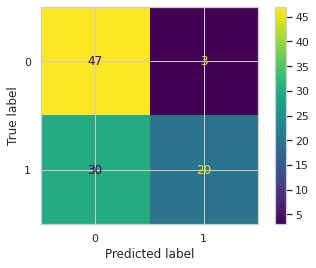

In [67]:
average = stat.mean(table[2])
Predict = [int(x) for x in [x >average for x in table[2]]]
cm = skl_metrics.confusion_matrix( ground_truth,Predict)
cm_display = skl_metrics.ConfusionMatrixDisplay(cm)
cm_display.plot()

Answer: Based on the confusion matrix, we found that the average threshold can generally selecting the negative pairs well. TN/(TN+FP) = 94% However, the average threshold can not select the positive pairs well. TP/(TP+FN) = 0.4

3) Create a ROC plot which shows the fraction of true positives on the Y axis and the fraction of false positives on the X axis. Please take care to make your ROC plots square, with both X and Y axes limited to the range [0:1].

/home/jingjinglab/cw/miniconda3/envs/Harry_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


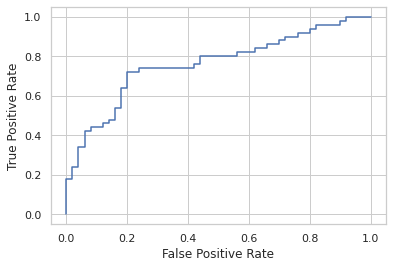

In [71]:
Predict_ratio = [(x - min(table[2])/(max(table[2]) - min(table[2]))) for x in table[2]]
fpr, tpr, _ = skl_metrics.roc_curve(ground_truth, Predict_ratio, pos_label=1)
roc_display = skl_metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

4) Determine the area under the ROC curve (AUROC). What does this value indicate about the performance of this algorithm? Can you confidently assess the performance of this algorithm with this value alone? Why or why not?

In [70]:
skl_metrics.roc_auc_score(ground_truth, Predict_ratio)

/home/jingjinglab/cw/miniconda3/envs/Harry_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.7595999999999999

Answer: It has a acceptable ability in disdinguishing between Pospairs and Negpairs. However, it is not working perfectly. We cannot only use this, because it is only local alignment which immediately stop after embracing one zero value. Let's say if there is a repeatitive alignments, this method will underestimate the results. Also the paramemter ( open gap penalty and extension gap penalty) might need to be optimized.

5) Once again, using local alignment, try a range of gap opening (1-20) and gap extension (1-5) costs with the BLOSUM62 matrix. Using the AUROC of each approach, determine which gap penalty performs the “best”. What does this pair of values suggest about the evolution of these sequences and the likelihood of insertions / deletions?

In [11]:
# Don't run this ... it can take a while ... I did this on the server. Please read mult_task.py if you need more information,
# Thanks
for i in range(1,21):
    for j in range(1,6):
        label = str(i) + '+' + str(j)
        print('nohup python mult_task.py --gep '+str(i)+ ' --gop '+ str(j)+ ' >log/'+label+'.log &')
        os.system('nohup python mult_task.py --gep '+str(i)+ ' --gop '+ str(j)+ ' >log/'+label+'.log &')

/home/jingjinglab/cw/miniconda3/envs/Harry_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SyntaxError: invalid syntax (<ipython-input-11-36ea9740a899>, line 1)

In [74]:
roc_scores = []
IDs = []
GOP = range(1,21)
GEP = range(1,6)
for i in GOP:
    for j in GEP:
        ID = str(i)+'-'+str(j)
        IDs.append(ID)
        table = pd.read_csv(ID+'.txt', sep ='\t', header = None, index_col= None)
        Predict_ratio = [(x - min(table[2])/(max(table[2]) - min(table[2]))) for x in table[2]]
        fpr, tpr, _ = skl_metrics.roc_curve(ground_truth, Predict_ratio, pos_label=1)
        #roc_display = skl_metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
        roc_scores.append(skl_metrics.roc_auc_score(ground_truth, Predict_ratio))
        

/home/jingjinglab/cw/miniconda3/envs/Harry_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5-4
0.8368


/home/jingjinglab/cw/miniconda3/envs/Harry_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


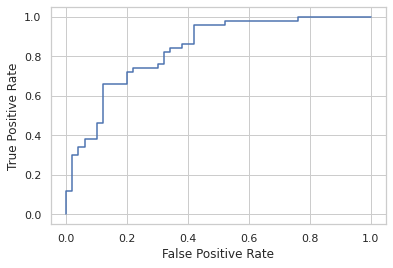

In [76]:
ID = IDs[int(np.where(roc_scores == max(roc_scores))[0])]
print(ID)
table = pd.read_csv(ID+'.txt', sep ='\t', header = None, index_col= None)
Predict_ratio = [(x - min(table[2])/(max(table[2]) - min(table[2]))) for x in table[2]]
fpr, tpr, _ = skl_metrics.roc_curve(ground_truth, Predict_ratio, pos_label=1)
roc_display = skl_metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
print(skl_metrics.roc_auc_score(ground_truth, Predict_ratio))

Answer: Based on my results, the combination of open penalty 5 and extension penalty 4 is the best for disdinguish the positive and negitive. This might indicate that the pairs are more like to have more mismatchs or small indel rather than very big gap since if there is very big gap, a strong open penalty would help the selection. Based on my results, the open penalty and extension penalty are similar values

6)
Using the BLOSUM50, BLOSUM62, PAM100 and PAM250 scoring matrices,
evaluate the performance of the global alignment algorithm using the selected
pair of best performing gap penalties. Evaluate your optional additional
extension algorithm as well, using the parameters it requires.

For each algorithm, generate a ROC plot demonstrating performance using
each of the 4 matrices, given the fixed gap costs. Of all these algorithms, which
performs the best as measured by AUROC?


In [ ]:

for i in range(0,100):
    compute_NeedlemanWunsch_Score(sequence_dirA,sequence_dirB, ground_truth, i ,'../scoring_matrices/BLOSUM50.mat',5,4,'N_BLO50_5_4')
    compute_NeedlemanWunsch_Score(sequence_dirA,sequence_dirB, ground_truth, i ,'../scoring_matrices/BLOSUM62.mat',5,4,'N_BLO62_5_4')
    compute_NeedlemanWunsch_Score(sequence_dirA,sequence_dirB, ground_truth, i ,'../scoring_matrices/PAM100.mat',5,4,'N_PAM100_5_4')
    compute_NeedlemanWunsch_Score(sequence_dirA,sequence_dirB, ground_truth, i ,'../scoring_matrices/PAM250.mat',5,4,'N_PAM250_5_4')                              

0.8208


/home/jingjinglab/cw/miniconda3/envs/Harry_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


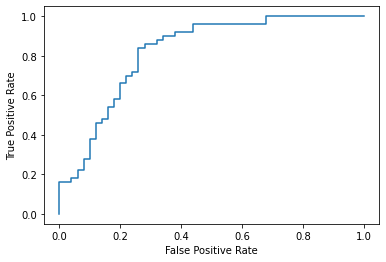

In [42]:
#N_PAM250         
table = pd.read_csv('N_PAM250_5_4.txt', sep ='\t', header = None, index_col= None)

#table = pd.read_csv(ID+'.txt', sep ='\t', header = None, index_col= None)
Predict_ratio = [(x - min(table[2])/(max(table[2]) - min(table[2]))) for x in table[2]]
fpr, tpr, _ = skl_metrics.roc_curve(ground_truth, Predict_ratio, pos_label=1)
roc_display = skl_metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
print(skl_metrics.roc_auc_score(ground_truth, Predict_ratio))



0.5438000000000001


/home/jingjinglab/cw/miniconda3/envs/Harry_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


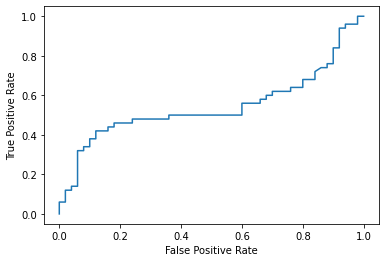

In [43]:
#N_PAM100         
table = pd.read_csv('N_PAM100_5_4.txt', sep ='\t', header = None, index_col= None)


Predict_ratio = [(x - min(table[2])/(max(table[2]) - min(table[2]))) for x in table[2]]
fpr, tpr, _ = skl_metrics.roc_curve(ground_truth, Predict_ratio, pos_label=1)
roc_display = skl_metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
print(skl_metrics.roc_auc_score(ground_truth, Predict_ratio))

0.6952


/home/jingjinglab/cw/miniconda3/envs/Harry_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


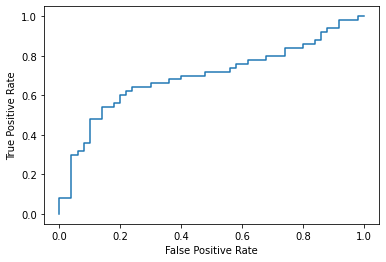

In [44]:
#N_BLOSUM62         
table = pd.read_csv('N_BLO62_5_4.txt', sep ='\t', header = None, index_col= None)

#table = pd.read_csv(ID+'.txt', sep ='\t', header = None, index_col= None)
Predict_ratio = [(x - min(table[2])/(max(table[2]) - min(table[2]))) for x in table[2]]
fpr, tpr, _ = skl_metrics.roc_curve(ground_truth, Predict_ratio, pos_label=1)
roc_display = skl_metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
print(skl_metrics.roc_auc_score(ground_truth, Predict_ratio))

0.8171999999999999


/home/jingjinglab/cw/miniconda3/envs/Harry_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


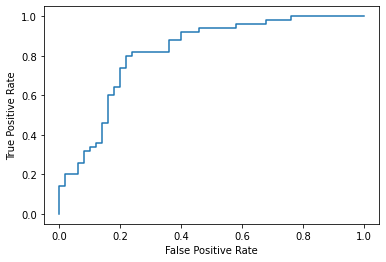

In [45]:
#N_BLOSUM50         
table = pd.read_csv('N_BLO50_5_4.txt', sep ='\t', header = None, index_col= None)

#table = pd.read_csv(ID+'.txt', sep ='\t', header = None, index_col= None)
Predict_ratio = [(x - min(table[2])/(max(table[2]) - min(table[2]))) for x in table[2]]
fpr, tpr, _ = skl_metrics.roc_curve(ground_truth, Predict_ratio, pos_label=1)
roc_display = skl_metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
print(skl_metrics.roc_auc_score(ground_truth, Predict_ratio))

Answer: Given the fix values,for global allignment. PAM250 has the best result. BLOSUM50 is slightly lower that PAM250. PAM100 and BLOSUM give relative poor results

7) For each algorithm, generate a ROC plot demonstrating performance using
each of the 4 matrices, given the fixed gap costs. Of all these algorithms, which
performs the best as measured by AUROC?

0.7718


/home/jingjinglab/cw/miniconda3/envs/Harry_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


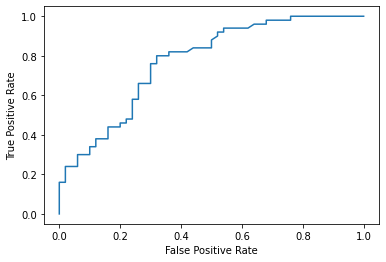

In [37]:
#BLOSUM50         
table = pd.read_csv('BLOSUM50_5_4.txt', sep ='\t', header = None, index_col= None)

#table = pd.read_csv(ID+'.txt', sep ='\t', header = None, index_col= None)
Predict_ratio = [(x - min(table[2])/(max(table[2]) - min(table[2]))) for x in table[2]]
fpr, tpr, _ = skl_metrics.roc_curve(ground_truth, Predict_ratio, pos_label=1)
roc_display = skl_metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
print(skl_metrics.roc_auc_score(ground_truth, Predict_ratio))

0.8368


/home/jingjinglab/cw/miniconda3/envs/Harry_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


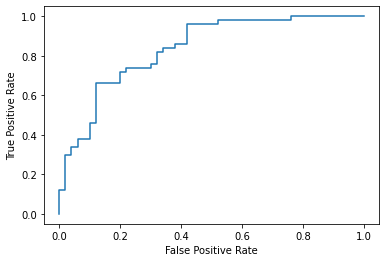

In [39]:
#BLOSUM62        
table = pd.read_csv('5-4.txt', sep ='\t', header = None, index_col= None)

#table = pd.read_csv(ID+'.txt', sep ='\t', header = None, index_col= None)
Predict_ratio = [(x - min(table[2])/(max(table[2]) - min(table[2]))) for x in table[2]]
fpr, tpr, _ = skl_metrics.roc_curve(ground_truth, Predict_ratio, pos_label=1)
roc_display = skl_metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
print(skl_metrics.roc_auc_score(ground_truth, Predict_ratio))

0.7748


/home/jingjinglab/cw/miniconda3/envs/Harry_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


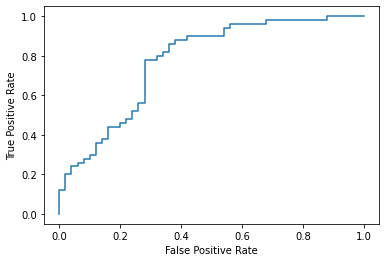

In [40]:
#PAM250        
table = pd.read_csv('PAM250_5_4.txt', sep ='\t', header = None, index_col= None)

#table = pd.read_csv(ID+'.txt', sep ='\t', header = None, index_col= None)
Predict_ratio = [(x - min(table[2])/(max(table[2]) - min(table[2]))) for x in table[2]]
fpr, tpr, _ = skl_metrics.roc_curve(ground_truth, Predict_ratio, pos_label=1)
roc_display = skl_metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
print(skl_metrics.roc_auc_score(ground_truth, Predict_ratio))

0.8380000000000001


/home/jingjinglab/cw/miniconda3/envs/Harry_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


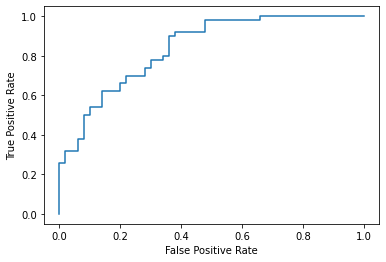

In [41]:
#PAM100        
table = pd.read_csv('PAM100_5_4.txt', sep ='\t', header = None, index_col= None)

#table = pd.read_csv(ID+'.txt', sep ='\t', header = None, index_col= None)
Predict_ratio = [(x - min(table[2])/(max(table[2]) - min(table[2]))) for x in table[2]]
fpr, tpr, _ = skl_metrics.roc_curve(ground_truth, Predict_ratio, pos_label=1)
roc_display = skl_metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
print(skl_metrics.roc_auc_score(ground_truth, Predict_ratio))

Answer: For these two alignment methods,given all the four score matirx, the best one is PAM100, local alignment.

8) Comment qualitatively on the best algorithm. What does the best performing algorithm indicate about the origin of these sequences?

Answer: The best alignment has a roc_auc_score 83.8, which is a relative good performance. We can see: at the false positive rate zero, the true positive rate can reach to around 0.25. And when the False positive rate reaches 0.4, the model already has a true positive rate 0.8

For understanding the origin of sequences, given PAM100 (Point accepted mutation) were developed for specific amounts of change or moloecular evolution. The origin for these sequences can be close to each other. And the large insertion or deletion should be less frequent. 
    
